<p><img alt="UdeA logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<div align="center">
  
<h1> <b> Laboratorio #4 Aprendizaje estadistico,regresión lineal multivariada</b> </h1>

</div>

<!-- <br> le permite hacer espacios -->
<br>

<hr size=10 noshade color="green">
<p>


<div align="right">       

<h3><i> <b> Ortíz Campo Jose David</b> <br>  
Universidad de Antioquia <br>
Instituto de Física  <br>
jose.ortizc@udea.edu.co

</i></h3>
</div>


---

## Importación de librerias



In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go


##Pregunta 1

# Laboratorio 04
Objetivo: Programar una regresión multivariada


1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.

In [48]:
func= lambda x1,x2: 2.1*x1-3.1*x2

N=100

#Datos para graficar toda la superficie
x1=np.linspace(-1,1,N)
x2=np.linspace(-1,1,N)
X_1,X_2 =np.meshgrid(x1, x2)
Y=func(X_1,X_2)

#Datos aleatorios que deben estar sobre la superficie

x_1= 2*np.random.random(N)-1
x_2= 2*np.random.random(N)-1

ys=func(x_1,x_2)

# Grafico
fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.add_trace(go.Scatter3d(x=x_1, y=x_2, z=ys, mode='markers', marker=dict(size=4, color='white')))
fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='Y'))
fig.show()






## Pregunta 2

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [49]:
N_params=3 # Este será el numero de parametros a encontrar
theta=np.random.random(N_params).reshape(N_params, 1)

## Pregunta 3

3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [50]:
unos=np.ones(N)
X=np.array([unos,x_1,x_2])

## Pregunta 4,5,6

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
    $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros:
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$



6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.



Los puntos 4,5,6 los realizaré como un solo literal, ya que no tiene sentido hacer una sola iteración sin modificar el valores de los $\Theta$

In [51]:
ys.shape

(100,)

In [52]:
# Definicion de funciones

Y=ys
theta=np.random.random(N_params).reshape(N_params, 1) # vuelvo a definir lo hecho en el punto 2 por si se quiere ejecutar esta celda en multiples ocasiones

def model(theta, X):
  return theta.T@X


def costo(h, Y):
  J= (h-Y)**2
  return J.mean()

def update_params(theta, h, Y, learning_rate):
  #Gradiente
  grad = np.dot((h-Y), X.T).T
  theta = theta - learning_rate*grad
  return theta

# Inicializar unica vez los valores que luego actualizaré
J=np.zeros(N)
learning_rate=0.01


for i in range(0,N):
  h=model(theta,X)
  J[i] = costo(h, Y)
  theta = update_params(theta, h, Y, learning_rate)

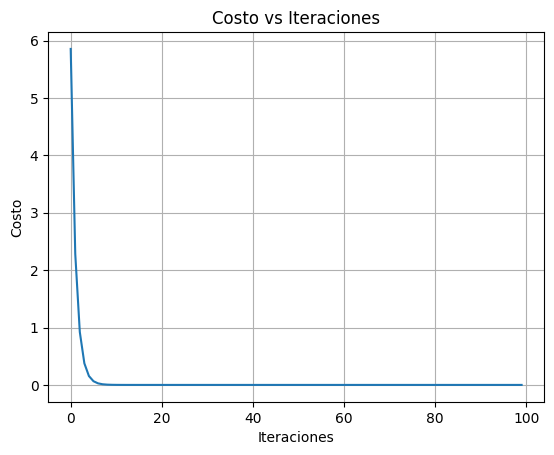

In [53]:
# Grafica para visualizar los valores de la función costo en cada iteración del for
plt.plot(J)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Costo vs Iteraciones')
plt.grid()
plt.show()

Los valores de los $\Theta$ que hacen que la función coste $J$ sea minima serían los siguientes

In [54]:
theta

array([[ 3.9917086e-17],
       [ 2.1000000e+00],
       [-3.1000000e+00]])

Claramente el valor de $θ_{1}$ sería 2.1 y el valor de $\theta_{2}$ sería  -3.1 dando exactamente los valores de la formula.

Nota: Claramente el valor del primer theta es el intercepto, que sería muy cercano a 0, dando así el valor que debería de dar.

## Generalización con clases

In [55]:
class MultilinearRegresion():
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    Nfeatures = X.shape[0]
    self.theta = np.random.random((Nfeatures, 1))

  def model(self):
    return self.theta.T @ self.X

  def costo(self):
    h = self.model()
    J = (h - self.Y)**2
    return J.mean()

  def update_params(self, learning_rate):
    h = self.model()
    grad = np.dot((h - self.Y), self.X.T).T
    self.theta = self.theta- learning_rate * grad

  def fit(self, learning_rate, iterations=100):
    J = np.zeros(iterations)
    for i in range(iterations):
      J[i] = self.costo()
      self.update_params(learning_rate)




Comprobaré si efectivamente esta generalización replica lo encontrado en los puntos anteriores.

In [56]:
modelo=MultilinearRegresion(X,Y)
modelo.fit(0.01)
modelo.theta

array([[ 5.76816987e-17],
       [ 2.10000000e+00],
       [-3.10000000e+00]])

Así, quedaría una forma general para una regresión lineal multivariada.

## Nota importante:

En las ecuaciones hay un factor de normalización al momento de calcular el valor del coste, es decir 1/2m. Sin embargo en la clase al desarrollar una generalización paso a paso no se consideró. Mas aún en los notebooks en la parte de generalización de forma vectorizada en ningún momento está multiplicando al valor del coste. Así pues, tampoco lo consideré para mis calculos y/o desarrollos. En vista de mis resultados puedo decir que por lo menos para este caso no hubo necesidad de hacer esa corrección(daba el valor exacto), sin embargo para calculos mas grandes o complicados, posiblemente si se deba de considerar.